# Trabalho Final - Visualização de Dados

Aluna: Anna Alicia Vasconcelos Milani

Dataset: https://www.kaggle.com/datasets/atharvasoundankar/viral-social-media-trends-and-engagement-analysis

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import seaborn as sns

sns.set_theme()

### Lendo dataframe

In [75]:
df = pd.read_csv("datasetSocialMedia.csv")
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


### Analisando os tipos de dados

In [76]:
df.dtypes

Post_ID             object
Post_Date           object
Platform            object
Hashtag             object
Content_Type        object
Region              object
Views                int64
Likes                int64
Shares               int64
Comments             int64
Engagement_Level    object
dtype: object

### Transformando a coluna de data em datetime

In [77]:
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

In [78]:
df.dtypes

Post_ID                     object
Post_Date           datetime64[ns]
Platform                    object
Hashtag                     object
Content_Type                object
Region                      object
Views                        int64
Likes                        int64
Shares                       int64
Comments                     int64
Engagement_Level            object
dtype: object

## 1. Gráfico de linhas
"Queremos entender como o total de visualizações das postagens evoluiu mês a mês nas diferentes plataformas em 2022."

### Filtrando o ano 2022

In [79]:
df_2022 = df[df['Post_Date'].dt.year == 2022]

In [80]:
df_2022.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
5,Post_6,2022-11-23,Instagram,#Challenge,Shorts,Australia,1323566,136282,86979,47129,Low


### Agrupando por mês e plataforma e somando as views

In [81]:
df_views_time = df_2022.groupby([pd.Grouper(key='Post_Date', freq='ME'), 'Platform'])['Views'].sum().unstack()

### Plot do gráfico de linhas

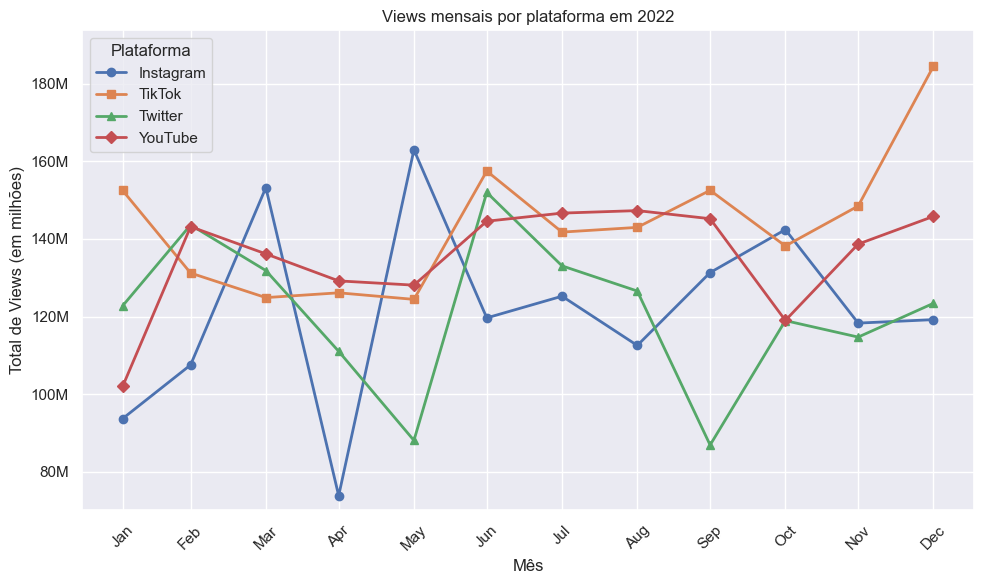

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))

markers = ['o', 's', '^', 'D', 'v'] 
for (col, marker) in zip(df_views_time.columns, markers):
    ax.plot(
        df_views_time.index,         
        df_views_time[col],          
        label=col,
        marker=marker,
        linewidth=2,
        markersize=6
    )

ax.set_title('Views mensais por plataforma em 2022')
ax.set_xlabel('Mês')
ax.set_ylabel('Total de Views (em milhões)')

ax.set_xticks(df_views_time.index)
ax.set_xticklabels(
    [d.strftime('%b') for d in df_views_time.index],
    rotation=45
)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M'))

y_min = df_views_time.min().min()
y_max = df_views_time.max().max()
ax.set_ylim(y_min * 0.95, y_max * 1.05)

ax.legend(title='Plataforma')
plt.tight_layout()
plt.show()


# 2. Gráfico de Área Empilhado
Queremos analisar como diferentes regiões do mundo contribuíram para o total de visualizações mensais ao longo de 2022.

### Agrupando por mês e região e somando as views

In [83]:
df_views_region = df_2022.groupby([pd.Grouper(key='Post_Date', freq='ME'), 'Region'])['Views'].sum().unstack()

### Plot do gráfico de área empilhado

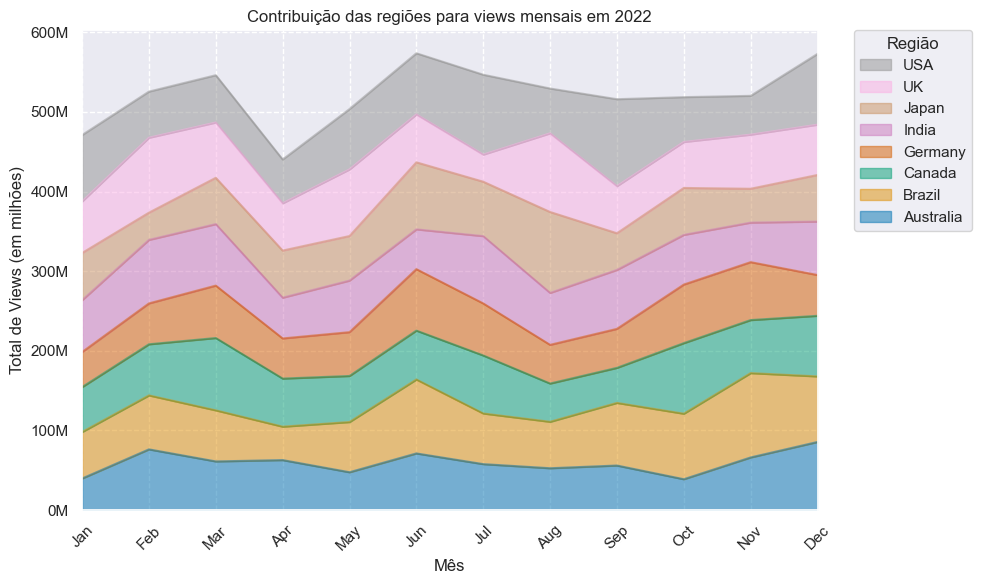

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = sns.color_palette('colorblind', n_colors=len(df_views_region.columns))

df_views_region.plot(
    kind='area',
    stacked=True,
    ax=ax,
    alpha=0.5,
    color=colors
)

ax.set_title('Contribuição das regiões para views mensais em 2022')
ax.set_xlabel('Mês')
ax.set_ylabel('Total de Views (em milhões)')

ax.set_xticks(df_views_region.index)
ax.set_xticklabels(
    [d.strftime('%b') for d in df_views_region.index],
    rotation=45
)

ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{x/1_000_000:.0f}M')
)

ax.grid(True, which='both', axis='both', linestyle='--', alpha=1)

y_max = df_views_region.sum(axis=1).max()
ax.set_ylim(0, y_max * 1.05)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles[::-1], labels[::-1],
    title='Região',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()

# Gráfico de Barras Vertical
Queremos identificar quais plataformas concentram o maior número de postagens.

### Contando quantos posts/ocorrências por plataforma

In [85]:
df_posts_platform = df['Platform'].value_counts().sort_values(ascending=False)

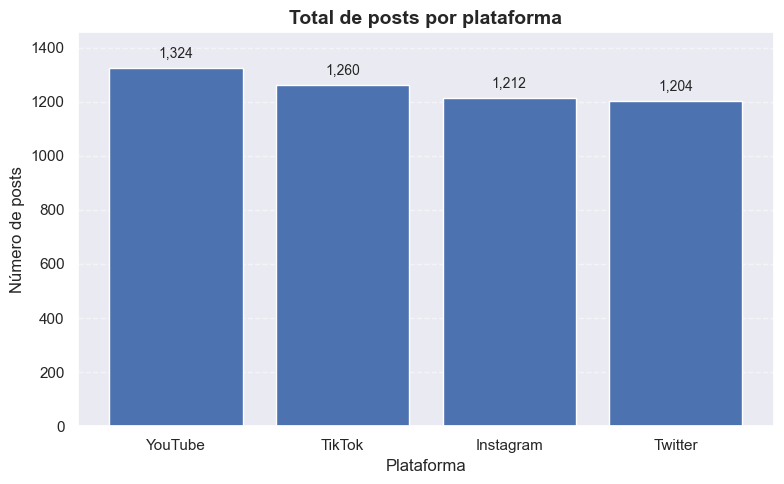

In [86]:
fig, ax = plt.subplots(figsize=(8,5))

bars = ax.bar(df_posts_platform.index, df_posts_platform.values)

ax.set_title('Total de posts por plataforma', fontsize=14, weight='bold')
ax.set_ylabel('Número de posts', fontsize=12)
ax.set_xlabel('Plataforma', fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', visible=False)

ax.set_ylim(0, df_posts_platform.max() * 1.10)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + df_posts_platform.max() * 0.02,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


# Gráfico de Barras Horizontal
Queremos identificar quais tipos de conteúdo geram mais engajamento em forma de comentários

### Somando o total de comentários por tipo de conteúdo

In [87]:
df_comments_by_type = df.groupby('Content_Type')['Comments'].sum().sort_values(ascending=True)

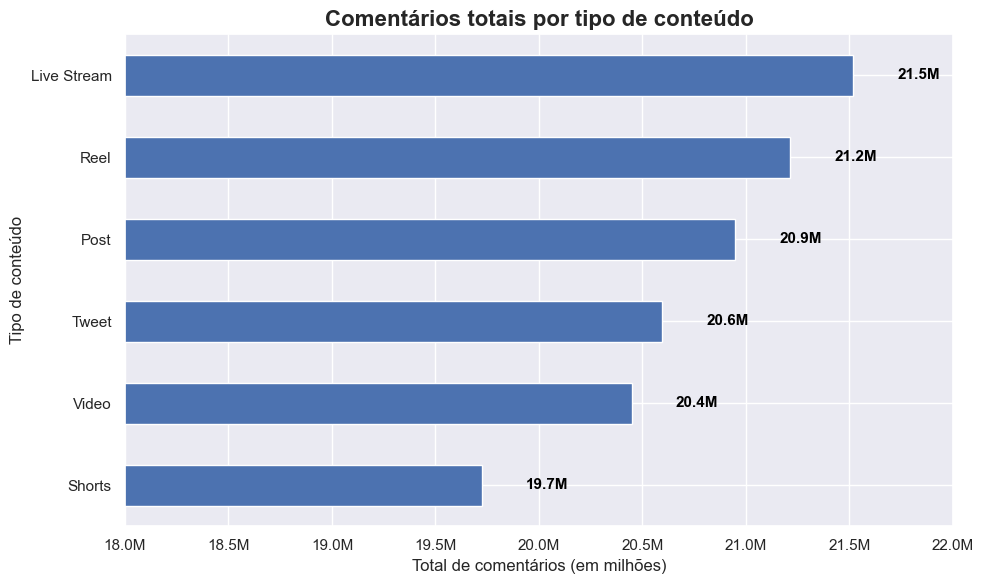

In [97]:
plt.figure(figsize=(10,6))
ax = df_comments_by_type.plot(kind='barh')

plt.xlabel('Total de comentários (em milhões)', fontsize=12)
plt.ylabel('Tipo de conteúdo', fontsize=12)
plt.title('Comentários totais por tipo de conteúdo', fontsize=16, weight='bold')

def millions_fmt(x, pos):
    return f'{x*1e-6:.1f}M'

ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_fmt))

max_val = df_comments_by_type.max()
max_lim = math.ceil(max_val / 1_000_000) * 1_000_000 
ax.set_xlim(18_000_000, max_lim)

for i, value in enumerate(df_comments_by_type):
    value_m = value / 1_000_000
    ax.text(
        value + (max_val * 0.01),
        i,
        f'{value_m:.1f}M',
        va='center',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()

# Gráfico de Pizza
Queremos saber quais são as 2 plataformas responsáveis pela maior parte das visualizações no ano de 2022

### Agrupando plataformas e somando views

In [89]:
df_views_platform_2022 = df_2022.groupby('Platform')['Views'].sum().sort_values(ascending=False)

### Selecionando as duas maiores plataformas com views

In [90]:
df_top2 = df_views_platform_2022.iloc[:2]

### Somando o restante

In [91]:
df_others_sum = df_views_platform_2022.iloc[2:].sum()

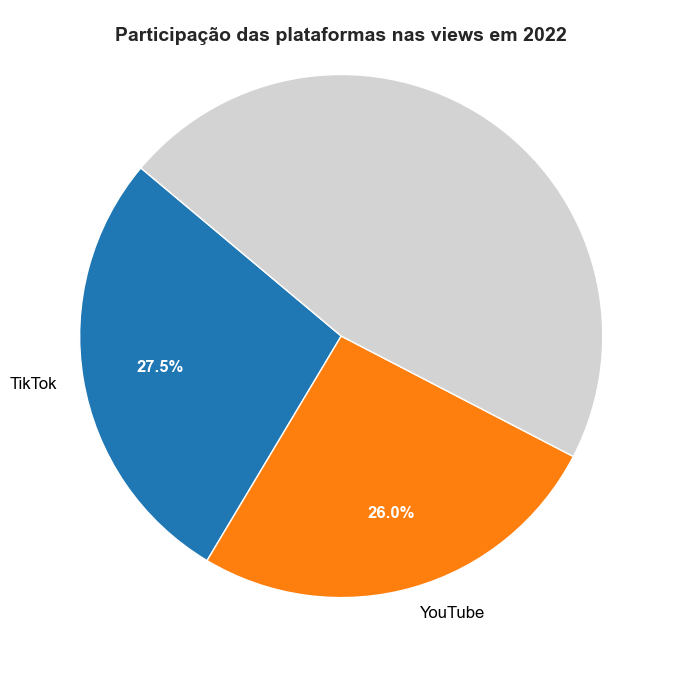

In [92]:
data_pie = pd.concat([df_top2, pd.Series({'Outros': df_others_sum})])

colors = ['#1f77b4', '#ff7f0e', 'lightgray']  

labels = [f'{label}' for label in top2.index] + ['']

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    data_pie,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 0 and pct != 0 else '',
    startangle=140,
    colors=colors,
    labels=labels,
    textprops={'color': 'black', 'fontsize': 12},
    pctdistance=0.7
)

texts[-1].set_text('')
autotexts[-1].set_text('')

for autotext in autotexts[:-1]:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.text(0, 1.15, 'Participação das plataformas nas views em 2022',
         ha='center', va='center', fontsize=14, weight='bold')

plt.ylabel('')
plt.tight_layout()
plt.show()
